In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Example from:
https://analyticsdefined.com/implementing-principal-component-analysis/

In [2]:
sales = pd.io.parsers.read_csv("Wholesale-customers-data.csv")
sales = sales.drop(["Channel", "Region"], axis=1)
sales.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Get the list of product types

In [3]:
# Get all the headers
header_labels = sales.columns.values.tolist()
header_labels

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


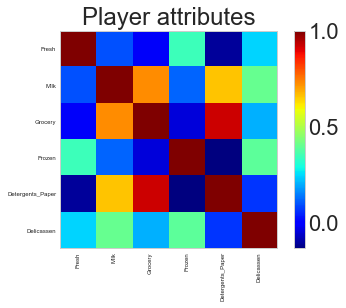

In [4]:
corr_matrix = sales.corr()
# plot correlation matrix
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr_matrix, cmap=cm.get_cmap('jet'))
plt.title('Player attributes')
plt.grid('off')
ax1.set_xticks(np.arange(len(header_labels)))
ax1.set_yticks(np.arange(len(header_labels)))
ax1.set_xticklabels(header_labels,fontsize=6,rotation=90)
ax1.set_yticklabels(header_labels,fontsize=6)
fig.colorbar(cax)

### This is when we want to try PCA!

In [5]:
data = pd.DataFrame(scale(sales), columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [6]:
pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

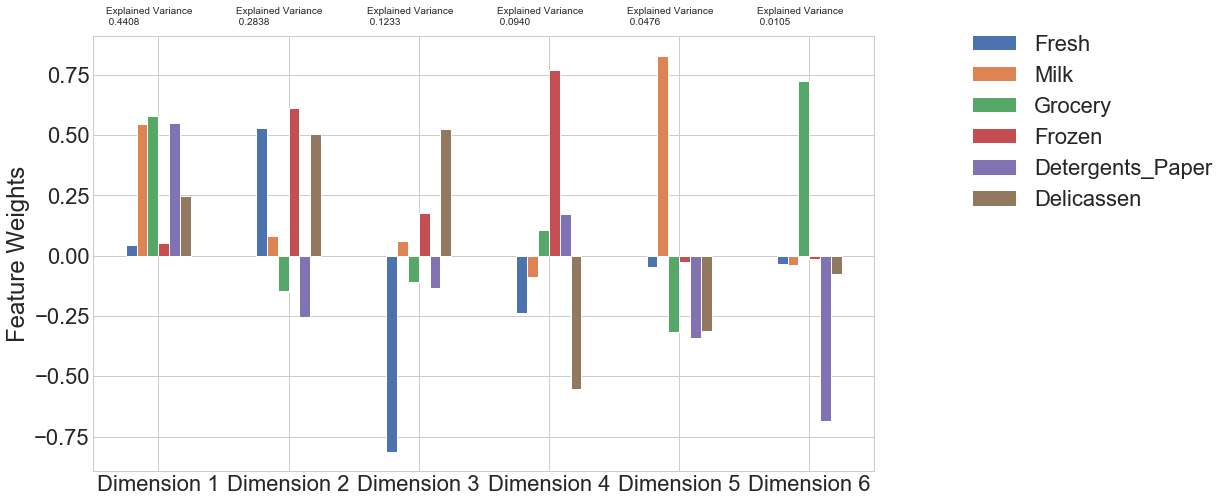

In [7]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
        
    ax.legend(bbox_to_anchor=(1.1, 1.05))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

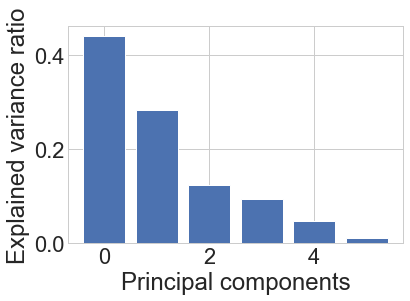

In [8]:
var_exp = pca.explained_variance_ratio_
plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance');
plt.ylabel('Explained variance ratio');
plt.xlabel('Principal components');

In [9]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

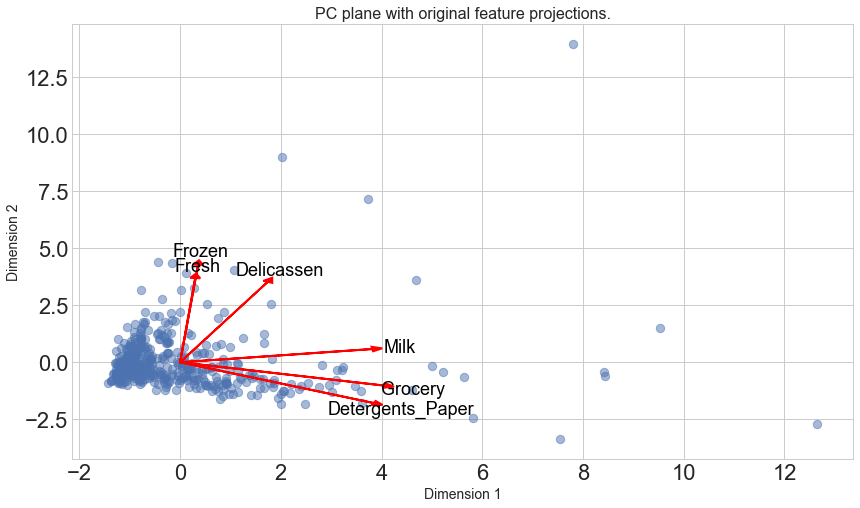

In [10]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot(data, reduced_data, pca)

In [11]:
def plot_arrow(vector,scale,text_label):
    plt.arrow(0, 0, scale*vector[0], scale*vector[1], head_width=0.5, head_length=0.5, fc='k', ec='k', lw=1)
    plt.text(vector[0]*1.3*scale, vector[1]*1.3*scale, text_label , color='black', ha='center', va='center', fontsize=18)